In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
PW = 8
PH = 6
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 250
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

from nltk.tokenize import RegexpTokenizer
import string 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'mbti_1.csv', 'PT.ipynb']


In [2]:
df = pd.read_csv("./mbti_1.csv", encoding="utf-8")
print("Number of users", len(df))

Number of users 8675


## Split Posts

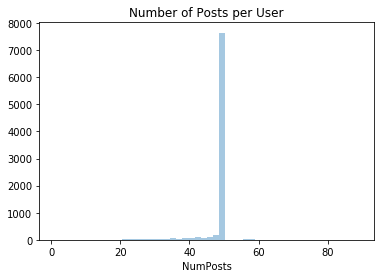

In [3]:
#Number of Posts per User
df["NumPosts"] = df["posts"].apply(lambda x: len(x.split("|||")))
sns.distplot(df["NumPosts"], kde=False).set_title("Number of Posts per User");

In [4]:
# #Split to posts
# def extract(posts, new_posts):
#     for post in posts[1].split("|||"):
#         new_posts.append((posts[0], post))

# posts = []
# df.apply(lambda x: extract(x, posts), axis=1)
# print("Number of users", len(df), "Number of posts", len(tors))

# df = pd.DataFrame(posts, columns=["type", "posts"])

## Explore

In [5]:
df.head(3)

,type,posts,NumPosts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...,50
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...,50
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o...",50


In [6]:
#Personality Types
groups = df.groupby("type").count()
groups.sort_values("posts", ascending=False, inplace=True)
print ("Personality types", groups.index.values)

Personality types ['INFP' 'INFJ' 'INTP' 'INTJ' 'ENTP' 'ENFP' 'ISTP' 'ISFP' 'ENTJ' 'ISTJ'
 'ENFJ' 'ISFJ' 'ESTP' 'ESFP' 'ESFJ' 'ESTJ']


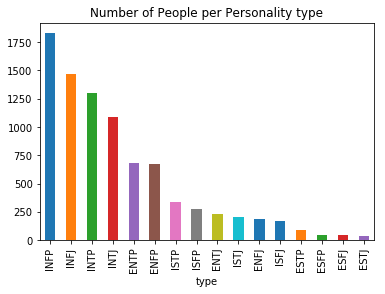

In [7]:
groups["posts"].plot(kind="bar", title="Number of People per Personality type");

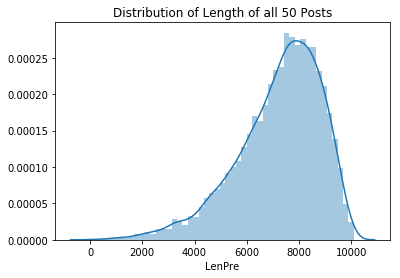

In [8]:
df["LenPre"] = df["posts"].apply(len)
sns.distplot(df["LenPre"]).set_title("Distribution of Length of all 50 Posts");

In [9]:
#Read Again
df = pd.read_csv("./mbti_1.csv", encoding="utf-8")
df["LenPre"] = df["posts"].apply(len)

## Link Removal

In [10]:
#Remove links 
df["postsM"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

#Check remaining posts for 'http'
df_http = df[df["postsM"].apply(lambda x: "http" in x)]
print("Number of posts containing 'http' ",len(df_http))

Number of posts containing 'http'  8


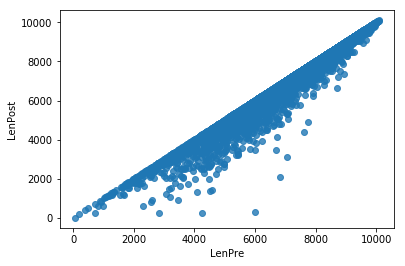

In [11]:
#Plot length reduction
df["LenPre"] = df["posts"].apply(len)
df["LenPost"] = df["postsM"].apply(len)

sns.regplot("LenPre", "LenPost", df, fit_reg=False);

In [12]:
# #Check Higly Reduced
# df["PercRem"] = df["LenPost"] * 1.0 / df["LenPre"]
# df[df["PercRem"] < 0.2].head(3)

In [13]:
#Clean Up
df["posts"] = df["postsM"]
df["LenPre"] = df["LenPost"]
df.drop(["postsM", "LenPost"], axis=1, inplace=True)

## Extract Words

In [14]:
df.head(30)

,type,posts,LenPre
0,INFJ,' enfp and intj moments sportscenter not top ten plays pranks What has been the most life-changing experience in your life? On repeat for most of today. May the PerC Experience immerse you. The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~ Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times a...,3401
1,ENTP,'I'm finding the lack of me in these posts very alarming. Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough... Giving new meaning to 'Game' theory. Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins. This...,6451
2,INTP,"'Good one _____ Of course, to which I say I know; that's my blessing and my curse. Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at... No, I didn't; thank you for a link! So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in c...",5060
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created... Dear ENTJ sub, Long time no see. Sincerely, Alpha None of them. All other types hurt in deep existential ways that I want no part of. Probably a sliding scale that depends on individual preferences, like everything in humanity. Draco Malfoy also. I'd say he's either 358 or 368. I'm either 358...",6184
4,ENTJ,'You're fired. That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS... But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything. Never mind. Just go on permanent vacation. Two months? I wouldn't be crazy about the idea. If you are really hi...,5727
5,INTJ,"'18/37 @.@ Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society.... INFP- Edgar Allen Poe was an INFP and he's in your siggy. People see the obvious Fi and are quick to put her as INFP. I agree that she has no Ne. I see her as an ISFP. Compare her to Haku (definite INFP). She is flat through most of Naruto.. but I don't... Lets get this party star...",8515
6,INFJ,"'No, I can't draw on my own nails (haha). Those were done by professionals on my nails. And yes, those are all gel. You mean those you posted were done by yourself on your own nails? Awesome! Probably the Electronic Screen Syndrome. With the advent of technology and social media, we all suffer from overstimulation on a daily basis. I'm guilty as well. In the past, I can be happy just... I love nail arts too! These are some of mine: 718282 718290 718298 718306 718314 This is the first...",7759
7,INTJ,"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called 'Everything' from there it get sorted into type and sub type i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it. Old unused software? ill take that off your hands :) i have a bunch of old adobe... i think its quite normal, i tend to only see my friends in real life every couple of months, as said 

In [15]:
#Strip Punctation
df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

#Remove Non-words
df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

#To lower
df["posts"] = df["posts"].apply(lambda x: x.lower())

#Remove multiple letter repating words
df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) #$

#Remove short/long words
df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

In [16]:
#Remove Type Hot Words
pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
pers_types = [p.lower() for p in pers_types]
p = re.compile("(" + "|".join(pers_types) + ")")

df["posts"] = df["posts"].apply(lambda x: p.sub('',x))

## BOW Model

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from nltk.stem.snowball import SnowballStemmer

In [18]:
#Stem
stemmer = SnowballStemmer("english")

df["posts"] = df["posts"].apply(lambda x: " ".join(stemmer.stem(p) for p in x.split(" ")))

In [19]:
vect = CountVectorizer(stop_words='english') 
#vect = TfidfVectorizer(stop_words='english')
X =  vect.fit_transform(df["posts"]) 

le = LabelEncoder()
y = le.fit_transform(df["type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [20]:
#Most frequent Words
vect.vocabulary_.get(u'infj')
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('like', 52989),
 ('think', 41207),
 ('just', 38414),
 ('dont', 37462),
 ('peopl', 34146),
 ('know', 27350),
 ('feel', 26043),
 ('thing', 24190),
 ('realli', 24124),
 ('time', 23678),
 ('becaus', 21785),
 ('make', 19251),
 ('type', 18813),
 ('person', 18577),
 ('want', 18475),
 ('veri', 18227),
 ('love', 16401),
 ('friend', 15518),
 ('good', 14490),
 ('someth', 13777),
 ('onli', 13219),
 ('work', 12124),
 ('alway', 11701),
 ('someon', 11447),
 ('look', 11433),
 ('life', 10814),
 ('need', 10510),
 ('read', 10366),
 ('year', 10169),
 ('thank', 10054),
 ('actual', 9932),
 ('thought', 9865),
 ('talk', 9698),
 ('post', 9679),
 ('mean', 9537),
 ('come', 9371),
 ('sure', 9160),
 ('right', 8718),
 ('pretti', 8665),
 ('use', 8655),
 ('differ', 8344),
 ('start', 7443),
 ('help', 7420),
 ('thread', 7403),
 ('said', 7388),
 ('mani', 7332),
 ('tri', 7265),
 ('understand', 7223),
 ('probabl', 6933),
 ('sometim', 6878),
 ('question', 6775),
 ('kind', 6644),
 ('point', 6620),
 ('tell', 6546),
 ('best

In [21]:
clf = MultinomialNB(alpha=0.25, fit_prior=False)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
print("Train accuracy:", np.mean(yp_train == y_train))

yp_test = clf.predict(X_test)
print("Test accuracy:", np.mean(yp_test == y_test))
#Train accuracy: 0.8624311515306776
#Test accuracy: 0.34101382488479265

Train accuracy: 0.8423209939797618
Test accuracy: 0.3294930875576037


In [22]:
#Most Frequent words across personality Types
feature_names = vect.get_feature_names()
maxC = 500

print (len(feature_names))
mfw = set()
for i, cls in enumerate(clf.feature_log_prob_):
    print("PT:", le.inverse_transform(i), len(cls))
    tdf = pd.DataFrame({"word":feature_names, "freq":cls})
    tdf.sort_values("freq", ascending=False, inplace=True)
    tdf= tdf.reset_index()
    if len(mfw) == 0:
        mfw = set(tdf[0:maxC]["word"])
    else:
        mfw = mfw.intersection(set(tdf[0:maxC]["word"]))
    print(tdf[0:][["freq", "word"]].head(20))
print(len(mfw))

81246
PT: ENFJ 81246
        freq    word
0  -4.319607    like
1  -4.570694   think
2  -4.671173    just
3  -4.735082   peopl
4  -4.744787    feel
5  -4.796487    dont
6  -4.933877    know
7  -5.017814  realli
8  -5.065937   thing
9  -5.159847  becaus
10 -5.210331    love
11 -5.212923  person
12 -5.225987    time
13 -5.263500  friend
14 -5.282797    want
15 -5.305318    make
16 -5.322547    veri
17 -5.545510    type
18 -5.609023    good
19 -5.612888  someth
PT: ENFP 81246
        freq    word
0  -4.062798    like
1  -4.349356   think
2  -4.400980    just
3  -4.557710   peopl
4  -4.573074    dont
5  -4.723133    know
6  -4.734807    feel
7  -4.809762  realli
8  -4.836700   thing
9  -4.906703    time
10 -4.912998    love
11 -5.025772  becaus
12 -5.043202    veri
13 -5.138732    make
14 -5.141374  friend
15 -5.146677    want
16 -5.169992    type
17 -5.173627  person
18 -5.419041   thank
19 -5.449767    good
PT: ENTJ 81246
        freq    word
0  -4.326255    like
1  -4.561302   think
2  -

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

        freq    word
0  -4.885094    like
1  -5.119079   think
2  -5.192699    dont
3  -5.278099    just
4  -5.404650   peopl
5  -5.526447    know
6  -5.597482  realli
7  -5.605696    type
8  -5.879048    feel
9  -5.946300  person
10 -5.957962  becaus
11 -5.981702    make
12 -5.981702    want
13 -5.993787   thing
14 -6.006020    veri
15 -6.006020    time
16 -6.180373   thank
17 -6.225324    good
18 -6.240769    love
19 -6.240769  friend
PT: ESTJ 81246
        freq    word
0  -5.135049    like
1  -5.192732   think
2  -5.402138   peopl
3  -5.435982    just
4  -5.507313    dont
5  -5.711688   thing
6  -5.787017    type
7  -5.826923    want
8  -5.826923    know
9  -5.837153  becaus
10 -5.922997    make
11 -5.934264    veri
12 -5.945661    time
13 -5.992590  person
14 -6.016907    feel
15 -6.029291  friend
16 -6.054529    love
17 -6.080421  realli
18 -6.221003  someth
19 -6.267343    work
PT: ESTP 81246
        freq    word
0  -4.481645    like
1  -4.776389    dont
2  -4.786992   think
3  -

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

        freq    word
0  -4.110117    like
1  -4.459245   think
2  -4.481673    just
3  -4.581780    dont
4  -4.754273   peopl
5  -4.767467  realli
6  -4.800609    feel
7  -4.936773   thing
8  -4.983617    know
9  -5.056659    type
10 -5.059889    time
11 -5.131977  becaus
12 -5.247969  person
13 -5.249923    love
14 -5.267684    want
15 -5.281719    make
16 -5.312475    veri
17 -5.436459  friend
18 -5.453096    good
19 -5.597211  someth
PT: ISTJ 81246
        freq    word
0  -4.267859    like
1  -4.567420    dont
2  -4.580320    just
3  -4.662596   think
4  -4.898672   peopl
5  -5.005314    know
6  -5.008630    time
7  -5.040686   thing
8  -5.135954    feel
9  -5.158845  realli
10 -5.232915    type
11 -5.260300  person
12 -5.310666  becaus
13 -5.358979    make
14 -5.424737    want
15 -5.424737  friend
16 -5.452817    work
17 -5.455410    veri
18 -5.539299  someth
19 -5.621638    good
PT: ISTP 81246
        freq    word
0  -4.243818    like
1  -4.407076    dont
2  -4.426329    just
3  -

In [23]:
for i, cls in enumerate(clf.feature_log_prob_):
    print("PT:", le.inverse_transform(i), len(cls))
    tdf = pd.DataFrame({"word":feature_names, "freq":cls})
    tdf.sort_values("freq", ascending=False, inplace=True)
    tdf= tdf.reset_index()
    tdf = tdf[tdf.word.apply(lambda x: not(x in mfw))]
    print(tdf[0:][["freq", "word"]].head(20))

PT: ENFJ 81246
         freq     word
119 -6.929093     song
136 -7.035657    today
160 -7.210776     sent
161 -7.210776  connect
167 -7.249805     case
169 -7.249805   moment
171 -7.249805    human
172 -7.269907    arent
174 -7.269907  opinion
181 -7.311363    bring
184 -7.311363    advic
186 -7.311363   import
192 -7.332754  absolut
194 -7.354613     cool
200 -7.376961     miss
203 -7.399819    night
205 -7.399819   romant
208 -7.399819     amaz
212 -7.423212  control
216 -7.423212    repli
PT: ENFP 81246
         freq     word
153 -6.969721    funni
154 -6.975223   awesom
159 -7.014609     went
160 -7.026154     cool
164 -7.031976     song
172 -7.067641  favorit
176 -7.098365    today
183 -7.136526     caus
184 -7.149577    dream
186 -7.149577  connect
187 -7.156166     okay
188 -7.156166    decid
200 -7.196644     bore
206 -7.210509     came
212 -7.231674    stori
216 -7.238830     glad
217 -7.238830     face
218 -7.238830   moment
221 -7.267976     hour
222 -7.267976     male
PT: 

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

         freq      word
129 -6.969956     logic
139 -7.004541   opinion
146 -7.077522     women
147 -7.077522      fuck
151 -7.090221     clear
155 -7.116112      case
161 -7.129314  descript
173 -7.198069      male
178 -7.212406      shit
179 -7.212406   control
182 -7.212406    import
183 -7.212406    direct
185 -7.226952     femal
189 -7.241712    result
191 -7.241712   respect
195 -7.271903  intellig
197 -7.287348     domin
204 -7.318971      cool
205 -7.318971    physic
206 -7.318971    cognit
PT: ENTP 81246
         freq      word
97  -6.539348      fuck
117 -6.728427      bore
134 -6.857508      shit
149 -6.985978    awesom
153 -7.000775   opinion
156 -7.041338     logic
163 -7.051741     women
168 -7.072878      joke
169 -7.072878   develop
171 -7.078233     human
173 -7.099943     arent
178 -7.127762   obvious
180 -7.150587      cool
188 -7.173946  intellig
191 -7.191830    stupid
199 -7.241147    import
203 -7.241147     studi
204 -7.247486     funni
205 -7.247486     debat
2

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

         freq       word
66  -6.777869       cool
101 -7.124145       shit
104 -7.152119      femal
112 -7.180898       bore
122 -7.272565       fuck
150 -7.446918     attent
153 -7.446918     awesom
154 -7.446918        let
157 -7.446918      trust
159 -7.485758       male
162 -7.485758      sleep
165 -7.485758  stereotyp
168 -7.485758       walk
169 -7.526168     theori
170 -7.526168       went
175 -7.526168       case
179 -7.526168      arent
180 -7.526168      logic
181 -7.526168       came
185 -7.568279       face
PT: INFJ 81246
         freq     word
150 -6.879019    human
156 -6.908917    dream
183 -7.033743     song
184 -7.047592     dear
188 -7.073491    today
191 -7.085489   moment
199 -7.119869    stori
207 -7.155474  connect
208 -7.155474  favorit
209 -7.171130   beauti
210 -7.184366    advic
211 -7.187034    heart
213 -7.195083     self
214 -7.197780   import
215 -7.203196     face
216 -7.214118   physic
218 -7.216867  absolut
219 -7.219624  opinion
220 -7.225160    night


/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

         freq        word
120 -6.724655       human
137 -6.831986       logic
161 -7.001342        fuck
166 -7.037953       exist
167 -7.040443      physic
171 -7.068240     opinion
173 -7.078542       femal
175 -7.088952      theori
181 -7.110103       basic
183 -7.120849        case
186 -7.137187     subject
187 -7.137187     obvious
194 -7.159394  particular
195 -7.162205       dream
196 -7.165024        shit
198 -7.167851        bore
199 -7.167851    intellig
200 -7.176380        walk
202 -7.182107        anim
204 -7.190758       arent
PT: ISFJ 81246
         freq       word
145 -7.139902   descript
150 -7.178184   inferior
153 -7.178184      hello
158 -7.217991    favorit
166 -7.280839       went
167 -7.280839      stori
172 -7.302697      worri
173 -7.302697     sister
176 -7.325045       song
180 -7.347903     stress
186 -7.347903      advic
188 -7.371296      kinda
189 -7.371296    opinion
190 -7.395249  difficult
191 -7.395249     result
197 -7.395249       face
200 -7.419790 

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151

         freq    word
96  -6.630707    fuck
124 -6.846170    shit
131 -6.913993    cool
146 -6.986752   drive
147 -6.995174    bore
175 -7.180459   arent
181 -7.180459   basic
182 -7.190690    went
183 -7.190690   stori
184 -7.201026   today
185 -7.201026  moment
186 -7.211470  physic
187 -7.211470   night
191 -7.222024   sleep
196 -7.243472    hour
206 -7.287801   clear
207 -7.287801   logic
208 -7.287801    left
210 -7.299197  bother
212 -7.299197  theori


In [614]:
clf = SGDClassifier(alpha=0.015)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
print("Train accuracy:", np.mean(yp_train == y_train))

yp_test = clf.predict(X_test)
print("Test accuracy:", np.mean(yp_test == y_test))
#Train accuracy: 0.8274625336236711
#Test accuracy: 0.40898617511520735

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Train accuracy: 0.6900217753298322
Test accuracy: 0.28110599078341014


## Plot Predictions

In [24]:
dft = pd.DataFrame(le.inverse_transform(yp_test),columns=["pred"])
dft["cnt"] =  1
groupsn = dft.groupby("pred").count()
groupsn.sort_values("cnt", ascending=False, inplace=True)
#sns.distplot( , kde=False);

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


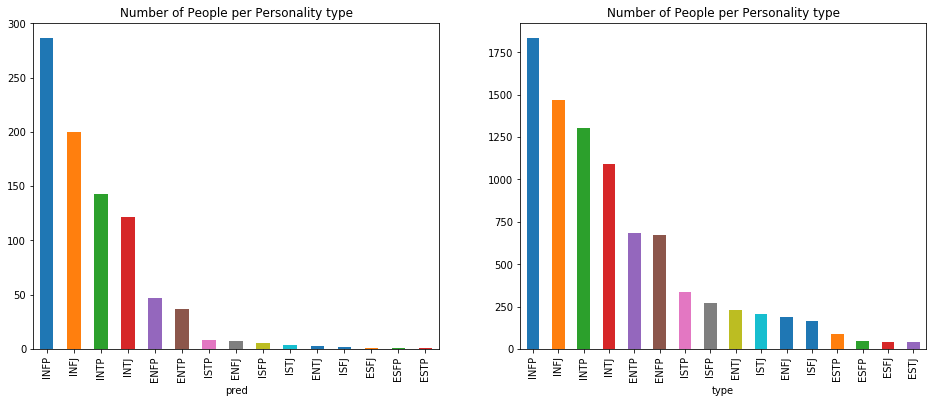

In [25]:
f, ax = plt.subplots(1,2,figsize=(2*PW,PH))
groupsn["cnt"].plot(kind="bar", title="Number of People per Personality type", ax=ax[0]);
groups["posts"].plot(kind="bar", title="Number of People per Personality type", ax=ax[1]);

## Count Analysis

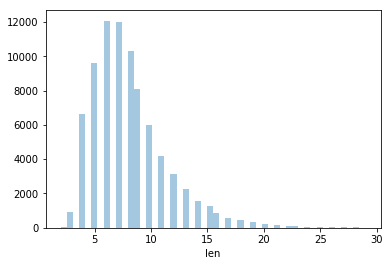

In [26]:
wdf = pd.DataFrame( vect.get_feature_names(),columns=["word"])
wdf["len"] = wdf.word.apply(len)
sns.distplot(wdf["len"], kde=False)

In [618]:
wdf.shape[0]

81246